In [77]:
pip install squarify

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# STEP 1: Load Dataset from GitHub
url = 'https://raw.githubusercontent.com/ppitchaporn/DADS5001-Condo/refs/heads/main/data_cleaned.csv'
df = pd.read_csv(url)
df.head()

,rent_cd_id,rent_cd_address,rent_cd_price,rent_cd_bed,rent_cd_bath,rent_cd_floorarea,rent_cd_features_walk,rent_cd_features_time,rent_cd_features_station,rent_cd_tags,...,rent_cd_tel,new_condo_name,condo_name,latitude,longitude,star,starnum_list,review_list_all,address,near_rail_meter
0,11455667,"1188 ถ.พหลโยธิน, จอมพล, จตุจักร, กรุงเทพ",60000,3,3,102,1 นาที (50 ม.) ถึง N9 BTS ห้าแยกลาดพร้าว,1.0,BTS ห้าแยกลาดพร้าว,"[{""rent_cd_tags"":""คอนโด\n ...",...,+66 92 394 4488,M Ladprao,เอ็ม ลาดพร้าว,13.816304,100.562784,4.6,94,['คอนโดสวยมาก ห้องก็โอเค ทำเลดีมากครับ ติดสถาน...,1188 ถ. พหลโยธิน แขวงจอมพล เขตจตุจักร กรุงเทพ...,50.0
1,11455672,"1188 ถ.พหลโยธิน, จอมพล, จตุจักร, กรุงเทพ",70000,3,3,102,1 นาที (50 ม.) ถึง N9 BTS ห้าแยกลาดพร้าว,1.0,BTS ห้าแยกลาดพร้าว,"[{""rent_cd_tags"":""คอนโด\n ...",...,+66 90 090 9472,M Ladprao,เอ็ม ลาดพร้าว,13.816304,100.562784,4.6,94,['คอนโดสวยมาก ห้องก็โอเค ทำเลดีมากครับ ติดสถาน...,1188 ถ. พหลโยธิน แขวงจอมพล เขตจตุจักร กรุงเทพ...,50.0
2,11453475,"1188 ถ.พหลโยธิน, จอมพล, จตุจักร, กรุงเทพ",55000,3,3,102,1 นาที (50 ม.) ถึง N9 BTS ห้าแยกลาดพร้าว,1.0,BTS ห้าแยกลาดพร้าว,"[{""rent_cd_tags"":""คอนโด\n ...",...,+66 98 476 4997,M Ladprao,เอ็ม ลาดพร้าว,13.816304,100.562784,4.6,94,['คอนโดสวยมาก ห้องก็โอเค ทำเลดีมากครับ ติดสถาน...,1188 ถ. พหลโยธิน แขวงจอมพล เขตจตุจักร กรุงเทพ...,50.0
3,11440703,"ชอย อารีย์ 5, สามเสนใน, พญาไท, กรุงเทพ",32000,2,2,103,8 นาที (680 ม.) ถึง N5 BTS อารีย์,8.0,BTS อารีย์,"[{""rent_cd_tags"":""คอนโด\n ...",...,+66 61 504 0830,Centurion Park,เซ็นจูเรียล ปาร์ค,13.782737,100.541630,4.3,38,['คอนโดใจกลางเมือง. ความปลอดภัยสูง. สะอาด. ...,5 ชอย อารีย์ 5 แขวงพญาไท เขตพญาไท กรุงเทพมหาน...,680.0
4,11532045,"สุทธิสารวินิจฉัย, สามเสนใน, พญาไท, กรุงเทพ",10500000,2,2,110,11 นาที (950 ม.) ถึง N6 BTS เสนาร่วม,11.0,BTS เสนาร่วม,"[{""rent_cd_tags"":""คอนโด\n ...",...,+66 95 774 2820,Baxtor Paholyothin 14,BAXTOR CONDOMINIUM,13.786617,100.552987,4.8,25,"['สงบ น่าอยู่ ยูนิตน้อย มีความเป็นส่วนตัวสูง',...","Thailand, 69 ซอย อินทามระ 4 แขวงสามเสนใน เขตพ...",950.0


In [79]:
# STEP 2: Clean and Convert Columns
df['rent_cd_price'] = df['rent_cd_price'].astype(str).str.replace(',', '', regex=False).astype(float)

# Drop non-numeric columns (11 columns)
irrelevant_columns = [
    'rent_cd_id', 'rent_cd_address', 'rent_cd_features_walk', 'rent_cd_features_station',
    'rent_cd_tags', 'rent_cd_agent', 'rent_cd_tel', 'new_condo_name', 'condo_name',
    'review_list_all', 'address', 'latitude', 'longitude'
]
df.drop(columns=irrelevant_columns, inplace=True, errors='ignore')

# Drop rows with missing values (rent_cd_features_time, near_rail_meter)
df = df.dropna()
# Drop Outliers
df = df[df['rent_cd_price'] <= 1000000]

#Create New Value
df['price_per_sqm'] = df['rent_cd_price'] / df['rent_cd_floorarea']

# Add Consitional Column target
def get_rate_type(price):
    if price < 10000:
        return 0
    elif price < 20000:
        return 1
    elif price >= 20000:
        return 2

df['rate_type'] = df['rent_cd_price'].apply(get_rate_type)
# df['rate_type'] = pd.qcut(df['rent_cd_price'], q=3, labels=[0, 1, 2])
df.head()

,rent_cd_price,rent_cd_bed,rent_cd_bath,rent_cd_floorarea,rent_cd_features_time,star,starnum_list,near_rail_meter,price_per_sqm,rate_type
0,60000.0,3,3,102,1.0,4.6,94,50.0,588.235294,2
1,70000.0,3,3,102,1.0,4.6,94,50.0,686.274510,2
2,55000.0,3,3,102,1.0,4.6,94,50.0,539.215686,2
3,32000.0,2,2,103,8.0,4.3,38,680.0,310.679612,2
5,35000.0,2,2,112,12.0,4.0,5,1010.0,312.500000,2


In [80]:
# Count the number of occurrences for each unique value in 'rate_type'
rate_type_counts = df['rate_type'].value_counts()

print("\nCounts of each unique value in 'rate_type':")
rate_type_counts


Counts of each unique value in 'rate_type':


,count
rate_type,
2,804
1,469
0,5


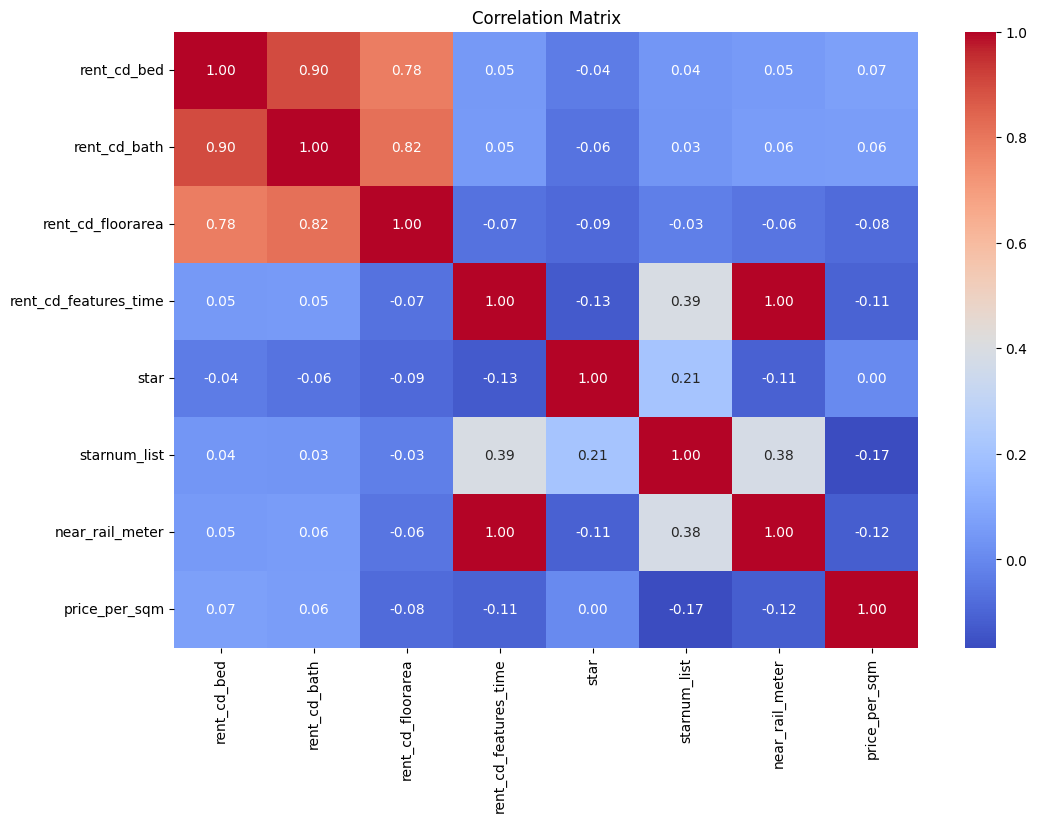

In [81]:
# STEP 3: Correlation Analysis
feature_df = df.iloc[:, 1:-1]
target_df = df.iloc[:,-1]

plt.figure(figsize=(12, 8))
corr_matrix = feature_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [82]:
# Drop highly correlated features (e.g., correlation > 0.80)
high_corr_pairs = []
threshold = 0.80
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and abs(corr_matrix.loc[i, j]) > threshold:
            high_corr_pairs.append((i, j, corr_matrix.loc[i, j]))

print("Highly correlated feature pairs (|r| > 0.80):")
for pair in high_corr_pairs:
    print(f"{pair[0]} ↔ {pair[1]} = {pair[2]:.2f}")

Highly correlated feature pairs (|r| > 0.80):
rent_cd_bed ↔ rent_cd_bath = 0.90
rent_cd_bath ↔ rent_cd_bed = 0.90
rent_cd_bath ↔ rent_cd_floorarea = 0.82
rent_cd_floorarea ↔ rent_cd_bath = 0.82
rent_cd_features_time ↔ near_rail_meter = 1.00
near_rail_meter ↔ rent_cd_features_time = 1.00


In [83]:
# Inital drops list
features_to_drop = set()
threshold = 0.80

# วนลูปครึ่งบนของ correlation matrix เพื่อไม่ให้พิจารณาคู่ซ้ำ
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        # ถ้าค่า correlation สูงกว่า threshold
        if abs(corr_matrix.iloc[i, j]) > threshold:
            feature1 = corr_matrix.columns[i]
            feature2 = corr_matrix.columns[j]

            # 3. คำนวณความสัมพันธ์ของแต่ละฟีเจอร์กับตัวแปรเป้าหมาย (y)
            corr_with_target1 = abs(feature_df[feature1].corr(target_df))
            corr_with_target2 = abs(feature_df[feature2].corr(target_df))

            # 4. เปรียบเทียบและเลือกฟีเจอร์ที่จะลบ
            if corr_with_target1 < corr_with_target2:
                features_to_drop.add(feature1)
                print(f"Drop '{feature1}' (corr with target: {corr_with_target1:.2f}) over '{feature2}' (corr with target: {corr_with_target2:.2f})")
            else:
                features_to_drop.add(feature2)
                print(f"Drop '{feature2}' (corr with target: {corr_with_target2:.2f}) over '{feature1}' (corr with target: {corr_with_target1:.2f})")

# 5. ลบฟีเจอร์ออกจาก DataFrame
df_reduced = feature_df.drop(columns=list(features_to_drop))

print("\nOriginal number of features:", feature_df.shape[1])
print("Number of features to drop:", len(features_to_drop))
print("Features to drop:", list(features_to_drop))
print("Number of features after dropping:", df_reduced.shape[1])
print("\nFinal features:", df_reduced.columns.tolist())

Drop 'rent_cd_bath' (corr with target: 0.44) over 'rent_cd_bed' (corr with target: 0.44)
Drop 'rent_cd_bath' (corr with target: 0.44) over 'rent_cd_floorarea' (corr with target: 0.50)
Drop 'near_rail_meter' (corr with target: 0.19) over 'rent_cd_features_time' (corr with target: 0.19)

Original number of features: 8
Number of features to drop: 2
Features to drop: ['near_rail_meter', 'rent_cd_bath']
Number of features after dropping: 6

Final features: ['rent_cd_bed', 'rent_cd_floorarea', 'rent_cd_features_time', 'star', 'starnum_list', 'price_per_sqm']


# Find Best Parameter

#Apply Model without PCA *** ✅

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Define X, y
X = df_reduced
y = target_df

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Process
model_no_pca = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=42, min_samples_leaf= 1, class_weight='balanced')
model_no_pca.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = model_no_pca.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("--- Model Evaluation (Decision Tree) ---")
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

--- Model Evaluation (Decision Tree) ---
Model Accuracy: 0.9844

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.98      0.98      0.98        94
           2       0.99      0.99      0.99       161

    accuracy                           0.98       256
   macro avg       0.66      0.66      0.66       256
weighted avg       0.98      0.98      0.98       256



In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# กำหนดค่าพารามิเตอร์ที่ต้องการทดลอง
param_grid = {
    'max_depth': [3, 4, 5, 6, 8, 10],
    'min_samples_leaf': [1, 5, 10, 15],
    'criterion': ['gini', 'entropy']
}

# สร้าง GridSearchCV (ใช้กับ Decision Tree)
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42, ),
                           param_grid=param_grid,
                           cv=4,
                           n_jobs=-1,
                           verbose=1)

# ค้นหาพารามิเตอร์ที่ดีที่สุด
grid_search.fit(X_train_scaled, y_train)

# แสดงพารามิเตอร์ที่ดีที่สุด
print(f"Best Parameters: {grid_search.best_params_}")

# ประเมินผลด้วยโมเดลที่ดีที่สุด
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"\nAccuracy with Best Model: {accuracy_best:.4f}")

Fitting 4 folds for each of 48 candidates, totalling 192 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1}

Accuracy with Best Model: 0.9766


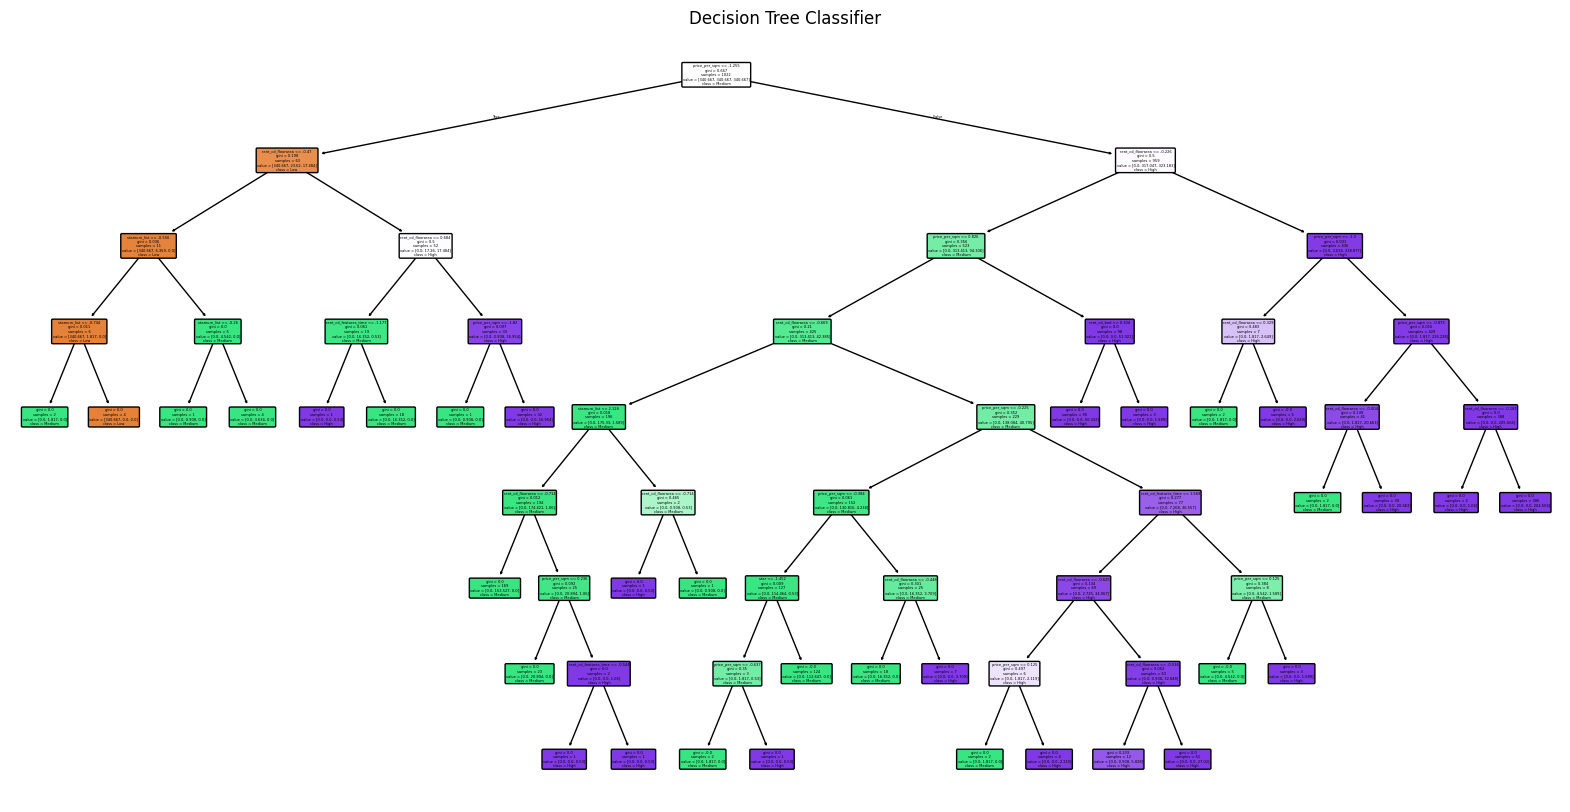

In [86]:
# prompt: show classification tree map

# !pip install graphviz scikit-learn
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model_no_pca, filled=True, feature_names=X.columns.tolist(), class_names=['Low', 'Medium', 'High'], rounded=True)
plt.title("Decision Tree Classifier")
plt.show()

#Apply Model with PCA

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# ไม่ต้อง import PCA แล้ว
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Define X, y
X = df_reduced
y_categorical = target_df

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical
)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Apply Decision Tree โดยใช้ข้อมูลที่ Scale แล้ว : ใช้ X_train_pca
model_pca = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=42, min_samples_leaf=1, class_weight='balanced')
model_pca.fit(X_train_pca, y_train)

# Model Evaluation : ใช้ X_test_pca
y_pred = model_pca.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print("--- Model Evaluation (Decision Tree) ---")
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

--- Model Evaluation (Decision Tree) ---
Model Accuracy: 0.9336

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.89      0.94      0.91        94
           2       0.96      0.94      0.95       161

    accuracy                           0.93       256
   macro avg       0.62      0.62      0.62       256
weighted avg       0.93      0.93      0.93       256



#Apply Random-Forest

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Find Best Parameters
# กำหนดค่าพารามิเตอร์ที่ต้องการทดลอง
param_grid = {
    'max_depth': [3, 4, 5, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'criterion': ['gini', 'entropy']
}

# สร้าง GridSearchCV (ใช้กับ Decision Tree)
# cv=5 คือการทำ Cross-Validation 4 รอบ
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
                           param_grid=param_grid,
                           cv=4,
                           n_jobs=-1,
                           verbose=1)

# ค้นหาพารามิเตอร์ที่ดีที่สุด
grid_search.fit(X_train_scaled, y_train)

# แสดงพารามิเตอร์ที่ดีที่สุด
print(f"Best Parameters: {grid_search.best_params_}")

# ประเมินผลด้วยโมเดลที่ดีที่สุด
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"\nAccuracy with Best Model: {accuracy_best:.4f}")

Fitting 4 folds for each of 60 candidates, totalling 240 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1}

Accuracy with Best Model: 0.9727


#Random Forest 1 - Apply GridSearch

In [89]:
# Random Forest Round 1
from sklearn.ensemble import RandomForestClassifier

# Train RandomForest
model_rf = RandomForestClassifier(criterion='entropy', n_estimators=50, max_depth=10, random_state=42, n_jobs=-1, class_weight='balanced')
model_rf.fit(X_train_scaled, y_train)

# Evaluation
y_pred_rf = model_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("--- Model Evaluation (Random Forest) ---")
print(f"Model Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

--- Model Evaluation (Random Forest) ---
Model Accuracy: 0.9805

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      0.99      0.97        94
           2       0.99      0.98      0.99       161

    accuracy                           0.98       256
   macro avg       0.65      0.66      0.65       256
weighted avg       0.98      0.98      0.98       256



In [90]:
# Get Feature Importance
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_rf.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
                 feature  importance
5          price_per_sqm    0.348855
1      rent_cd_floorarea    0.285539
4           starnum_list    0.215428
2  rent_cd_features_time    0.057170
0            rent_cd_bed    0.055487
3                   star    0.037522


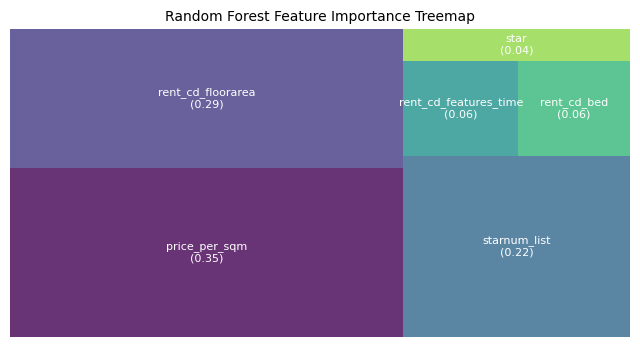

In [91]:
# Create Tree map
import matplotlib.pyplot as plt
import squarify # install this: pip install squarify
import pandas as pd

sizes = feature_importance_df['importance'].tolist()
labels = [f"{row.feature}\n({row.importance:.2f})" for idx, row in feature_importance_df.iterrows()]
colors = [plt.cm.viridis(i/float(len(sizes))) for i in range(len(sizes))] # Use a colormap

# Create the treemap
plt.figure(figsize=(8, 4))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8,
              text_kwargs={'fontsize': 8, 'color': 'white', 'wrap': True}) # Adjust text_kwargs for better readability
plt.title('Random Forest Feature Importance Treemap', fontsize=10)
plt.axis('off') # Hide axes
plt.show()

# Random Forest 2 - Apply Importance Feature Selection, Standardize,

In [92]:
# prompt: drop star column from X_train_scaled
# Random Forest Round 2

# Define X, y (using df_reduced which has features dropped based on correlation)
X = df_reduced.drop(columns=['star'], errors='ignore') # Drop 'star' here
y_categorical = target_df

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical
)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train RandomForest
model_rf = RandomForestClassifier(criterion='gini', n_estimators=1000, max_depth=8, random_state=42, n_jobs=-1, min_samples_leaf= 1)
model_rf.fit(X_train_scaled, y_train)

# Evaluation
y_pred_rf = model_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("--- Model Evaluation (Random Forest) ---")
print(f"Model Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

--- Model Evaluation (Random Forest) ---
Model Accuracy: 0.9844

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.98      0.98      0.98        94
           2       0.99      0.99      0.99       161

    accuracy                           0.98       256
   macro avg       0.66      0.66      0.66       256
weighted avg       0.98      0.98      0.98       256



In [93]:
!pip install xgboost

In [94]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# --- Apply XGBoost Model ---

# ข้อควรระวังสำคัญ: XGBoost คาดหวังว่าค่า Label (ตัวแปรตาม) ของ multi-class classification
# จะต้องเริ่มจาก 0 (เช่น 0, 1, 2, 3) แต่ข้อมูล rate_type ของเราตอนนี้เป็น 1, 2, 3, 4
# ดังนั้นเราจึงต้องลบ 1 ออกจาก y_train และ y_test ก่อนนำไปใช้กับ XGBoost
# y_train_xgb = y_train - 1
# y_test_xgb = y_test - 1

# 1. สร้างและกำหนดค่าพารามิเตอร์ให้กับโมเดล XGBoost
# เราใช้ 'multi:softmax' เพราะเป็นการจำแนกประเภทแบบหลายกลุ่ม (มากกว่า 2 กลุ่ม)
model_xgb = xgb.XGBClassifier(
    objective='multi:softmax',  # กำหนดเป้าหมายเป็นการจำแนกหลายกลุ่ม
    num_class=3,                # จำนวนกลุ่มเป้าหมาย (เรามี 4 กลุ่ม rate_type)
    n_estimators=1000,          # จำนวนต้นไม้ที่ใช้ในการ boosting (ปรับค่าได้)
    learning_rate=0.05,         # อัตราการเรียนรู้ (ค่าต่ำๆ มักจะให้ผลดี แต่ต้องใช้ n_estimators เยอะขึ้น)
    max_depth=5,                # ความลึกสูงสุดของแต่ละต้นไม้
    subsample=0.8,              # สัดส่วนของข้อมูลที่จะสุ่มมาใช้ในแต่ละต้นไม้
    colsample_bytree=0.8,       # สัดส่วนของฟีเจอร์ที่จะสุ่มมาใช้ในแต่ละต้นไม้
    use_label_encoder=False,    # ตั้งเป็น False เพื่อปิดการใช้งาน label encoder อัตโนมัติ (เป็น Best Practice)
    eval_metric='mlogloss',     # Metric ที่ใช้ในการประเมินผลระหว่างเทรน
    random_state=42             # เพื่อให้ได้ผลลัพธ์เหมือนเดิมทุกครั้งที่รัน
)

# 2. ทำการเทรนโมเดลด้วยข้อมูล Training
print("--- Starting XGBoost Model Training ---")
model_xgb.fit(X_train_scaled, y_train)
print("--- Model Training Finished ---")

# 3. ทำนายผลกับข้อมูล Test
y_pred_xgb_raw = model_xgb.predict(X_test_scaled)

# 4. ประเมินผลโมเดล

accuracy_xgb = accuracy_score(y_test, y_pred)
report_xgb = classification_report(y_test, y_pred, target_names=['RateType_1', 'RateType_2', 'RateType_3'], zero_division=0)

print(f"\n--- Model Evaluation (XGBoost) ---")
print(f"Model Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report:")
print(report_xgb)

# 5. (Optional) แสดง Feature Importance
# ดูว่าฟีเจอร์ไหนที่โมเดล XGBoost ให้ความสำคัญมากที่สุด
feature_importance_xgb = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_xgb.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importances (XGBoost):")
print(feature_importance_xgb)

--- Starting XGBoost Model Training ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:52:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- Model Training Finished ---

--- Model Evaluation (XGBoost) ---
Model Accuracy: 0.9336

Classification Report:
              precision    recall  f1-score   support

  RateType_1       0.00      0.00      0.00         1
  RateType_2       0.89      0.94      0.91        94
  RateType_3       0.96      0.94      0.95       161

    accuracy                           0.93       256
   macro avg       0.62      0.62      0.62       256
weighted avg       0.93      0.93      0.93       256


Feature Importances (XGBoost):
                 feature  importance
0            rent_cd_bed    0.688163
1      rent_cd_floorarea    0.156330
4          price_per_sqm    0.089194
3           starnum_list    0.037797
2  rent_cd_features_time    0.028515
